In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#Consider using Plotly

## Import Data

In [3]:
Raw_Data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing.csv")
Raw_Data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Describe and Learn more about the Data
* Visualization
* Baseline metrics
* Mainly to understand our data

In [4]:
Raw_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
Raw_Data["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
Raw_Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
Raw_Data.isnull().sum()
# Option 1 to drop all columns
# Option 2 we can use the mean to fill
# Option 3 we can use median to fill
Raw_Data = Raw_Data.dropna(axis=0)
Raw_Data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


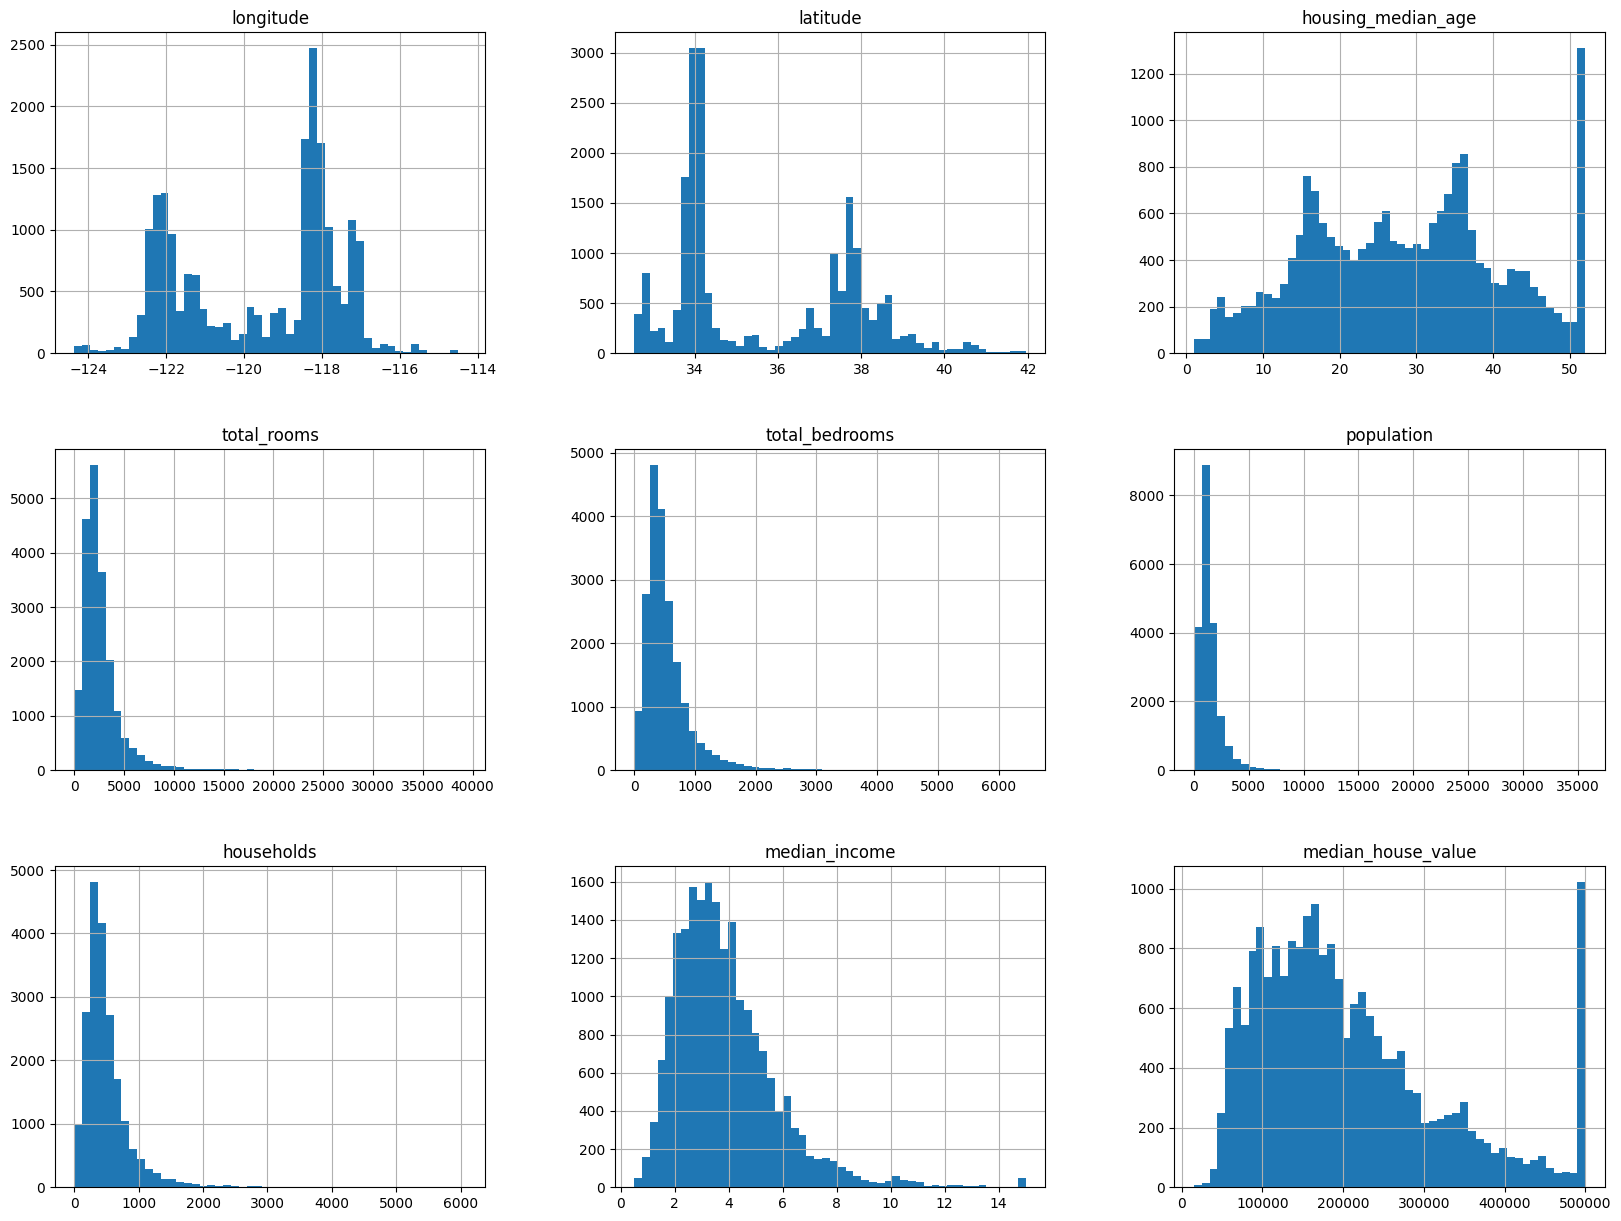

In [8]:
# Plots Histograms for all columns in current Data Frame
def show_hist(data):
  data.hist(bins=50, figsize=(20,15))
  plt.show()
show_hist(Raw_Data)

## Conclusion ( Describe and Learn more about the Data )
* Our "median_house_value" and "housing_median_age" appear to be capped at a limit, shown by the large spike/maximum towards the far right of the histogram
* * Two Solutions:
* * * Either gather more data from districts that were capped
* * * Or we can remove those pieces of data from the training set
* It also appears that the "median_income" column is not scaled normally
* Its also important to note that many histograms represent a tail heavy distribution
* * We may consider to transform these distributions into a Guassian curve

In [9]:
# How Many Values are at the Max
print(Raw_Data["median_house_value"].value_counts().max())
print(Raw_Data["housing_median_age"].value_counts().max())
Raw_Data.isnull().sum()
#Can consider removing housing_median_age

958
1265


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


## Integer Encoding our ocean_proximity to then later one hot encode

In [10]:
# Determine Depth

depth = Raw_Data["ocean_proximity"].value_counts()
depth

# Implement one hot encode function
# Important note TensorFlow does not allow to one_hot encode strings so we gotta get our hands dirty
# tf.one_hot(Raw_Data["ocean_proximity"], depth=5)

# Version 1 not very efficient O(n^2)

'''
def int_assign(col):
  new_col = col.copy()
  ref = set(col)
  for index, x in enumerate(col):
    for j, y in enumerate(ref):
      if y == x:
        new_col[index] = j
        break
  return new_col
'''

# Version 2 O(n)
# Making sure to copy dataset so that we do not alter original values

def int_assign(col):
  new_col = list(set(col.copy()))
  dict_map = {cat: index for index, cat in enumerate(new_col)}
  return col.map(dict_map), dict_map
data_v1 = Raw_Data.copy()
new_col, ocean_proximity_map = int_assign(data_v1["ocean_proximity"])
data_v1["ocean_proximity"] = new_col
# Dropping all not filled columns
data_v1.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


## One Hot Encoding Process
* Since we have our integer expressive column "ocean_proximity" we can now use tf.one_hot()
* Then we need to drop the ocean_proximity and concat our new columns

In [11]:
one_hot_encoded_array = tf.one_hot(data_v1["ocean_proximity"], depth=5) # depth is the amount of unique values
one_hot_encoded_np = one_hot_encoded_array.numpy()
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_np, columns=[item for item,value in ocean_proximity_map.items()])
one_hot_encoded_df

,NEAR BAY,NEAR OCEAN,<1H OCEAN,ISLAND,INLAND
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
20428,0.0,0.0,0.0,0.0,1.0
20429,0.0,0.0,0.0,0.0,1.0
20430,0.0,0.0,0.0,0.0,1.0
20431,0.0,0.0,0.0,0.0,1.0


In [12]:
data_v1 = data_v1.reset_index(drop=True)
one_hot_encoded_df = one_hot_encoded_df.reset_index(drop=True)
data_v1 = pd.concat([data_v1, one_hot_encoded_df], axis=1)
data_v1 = data_v1.drop("ocean_proximity", axis=1)
data_v1.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
NEAR BAY,0


## Atrribute Simplfication/Combination
* Simplifying so atrributes like:
* * Total rooms per Household
* * Total bedrooms per Household
* * Population per Household

## Data Visualization

### Goals

1. **Assess Feature Correlations**
   - Identify features that have strong correlations with the target variable (housing price) to prioritize them in modeling.

2. **Identify Geographical Patterns**
   - Use geographical visualizations to detect spatial patterns in the data that may influence housing prices.

3. **Evaluate Data Quality**
   - Use visualizations to check for missing values, outliers, and other data quality issues.

### Visualizations
- Histograms, box plots for distributions
- Scatter plots, pair plots for relationships
- Heatmaps for correlations

## 1.) Assess_Feature_Correlations

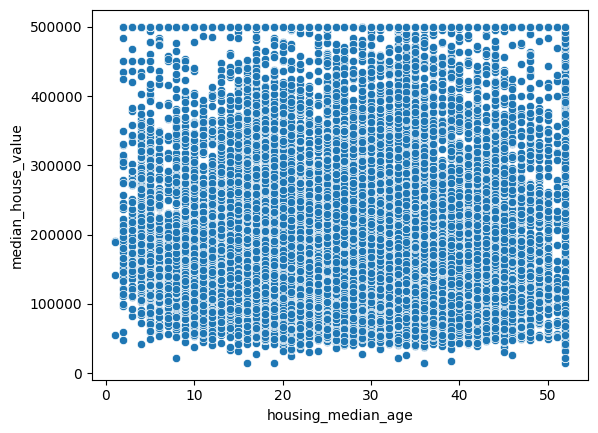

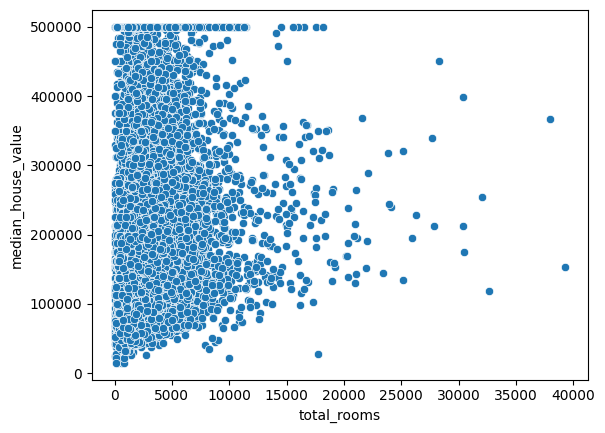

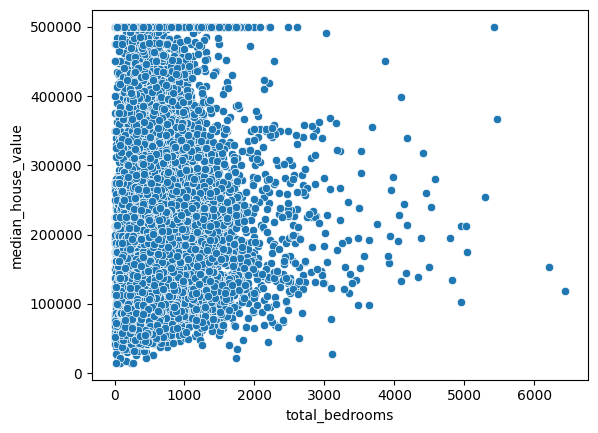

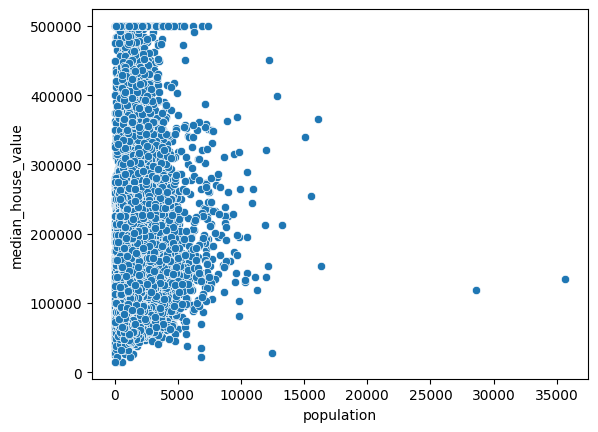

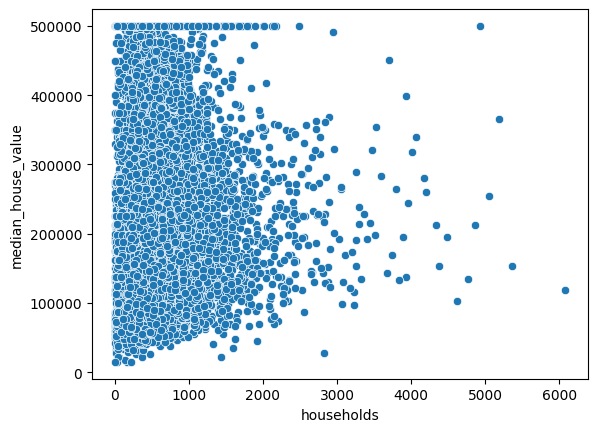

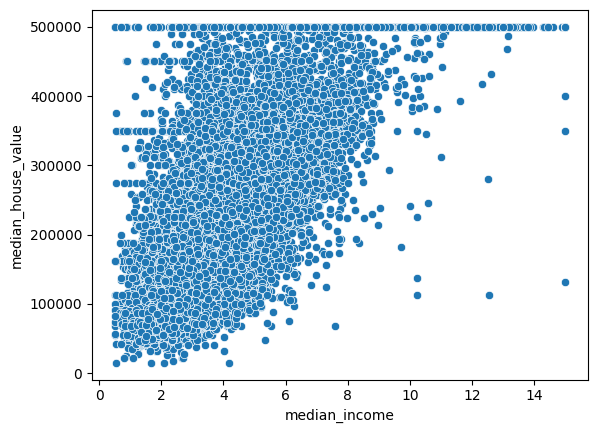

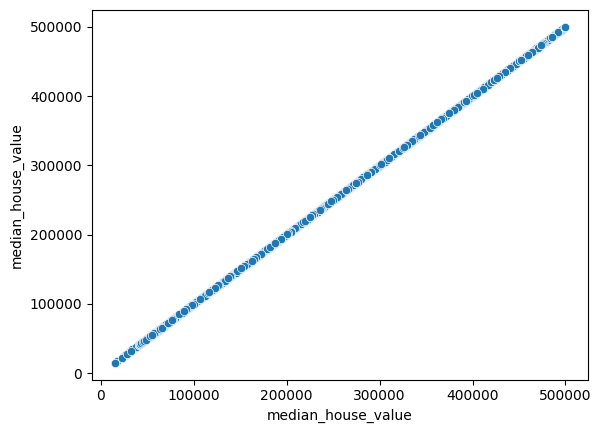

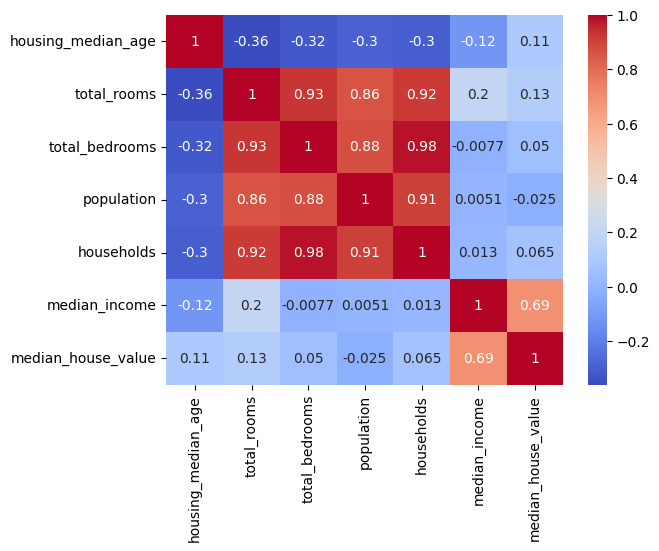

In [13]:
def Assess_Feature_Correlations(data):
  # 1.) Assess Feature Correlations
  # pair plots, correlation matrix
  data_plot = data.copy()
  data_plot = data_plot.drop("ocean_proximity", axis=1)
  data_plot = data_plot.drop("longitude", axis=1)
  data_plot = data_plot.drop("latitude", axis=1)
  for value in data_plot.columns:
    sns.scatterplot(data_plot, x=value, y=data_plot["median_house_value"])
    plt.show()
  corr_matrix = data_plot.corr()
  sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
  plt.show()
Assess_Feature_Correlations(Raw_Data)


## 1.) Assess_Feature_Correlations( Conclusion )
* The only relationship that stands out is the "housing_median_value" vs "median_income". Looking at the scatterplot it may not be immediatly obivous but there is a positive correlation between these two values. To verify this relationship I have also visalued a heat map, which proves that the relationship between these two are positive with a value of 0.69. This intuativley makes sense, as the income in that disctrict increases so do the prices of housing.

## 2.) Identify Geographical Patterns

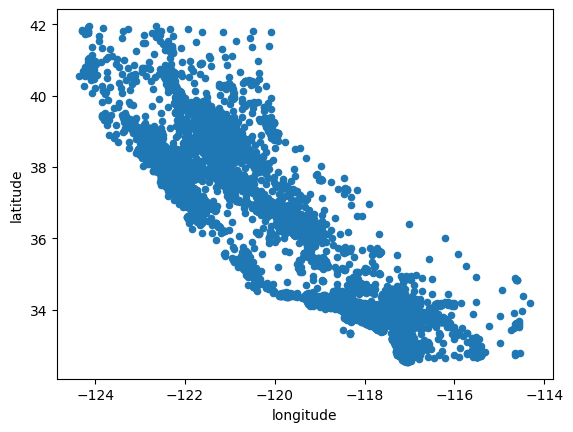

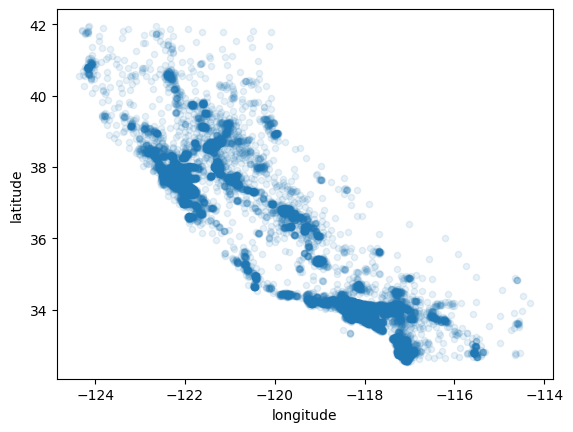

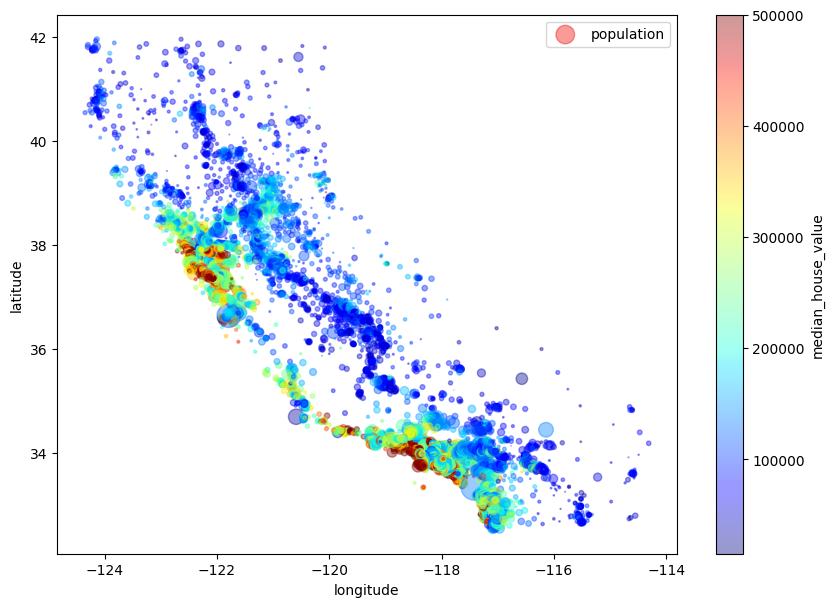

In [14]:
def Identify_Geographical_Patterns(data):
  #Geaographical Data
  data.plot(kind="scatter", x="longitude", y="latitude")
  plt.show()
  data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
  plt.show()
  data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=data["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
  plt.legend()
  plt.show()
Identify_Geographical_Patterns(Raw_Data)

## 2.) Identify Geographical Patterns( Conclusion )
* This is intersting to look at, intuitively housing prices are more expensive near the coast, from what looks like to be Los Angeles and San Fransico. And we can clearly see how densly packed these locations are. The combination of population density and location in these areas could provide significant data when training our predictive model

## 3.) Evaluate Data Quality

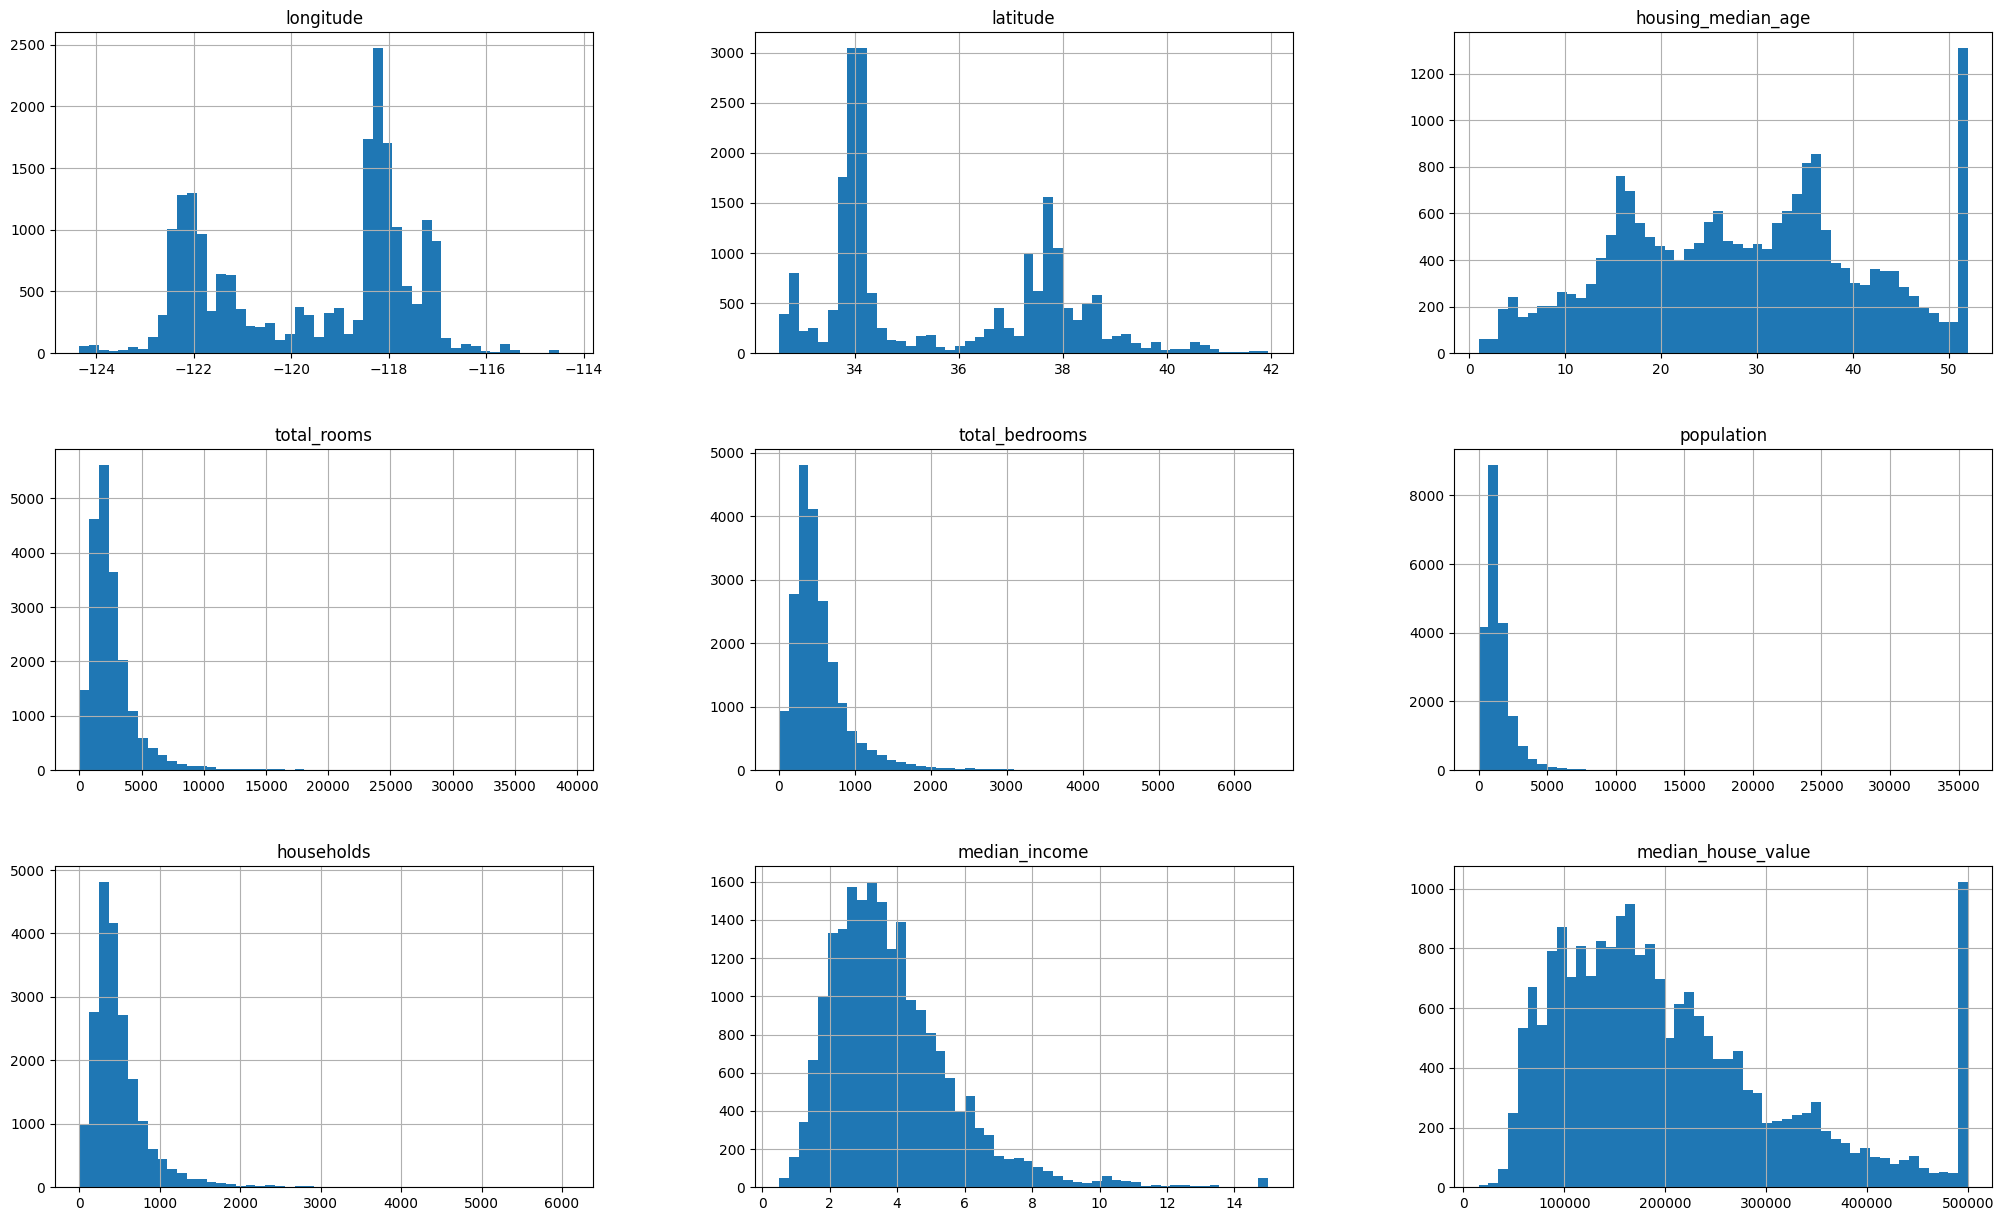

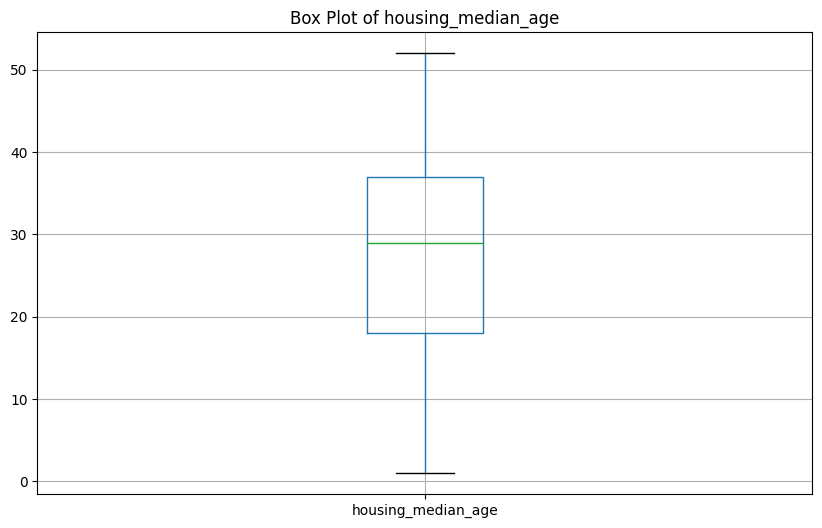

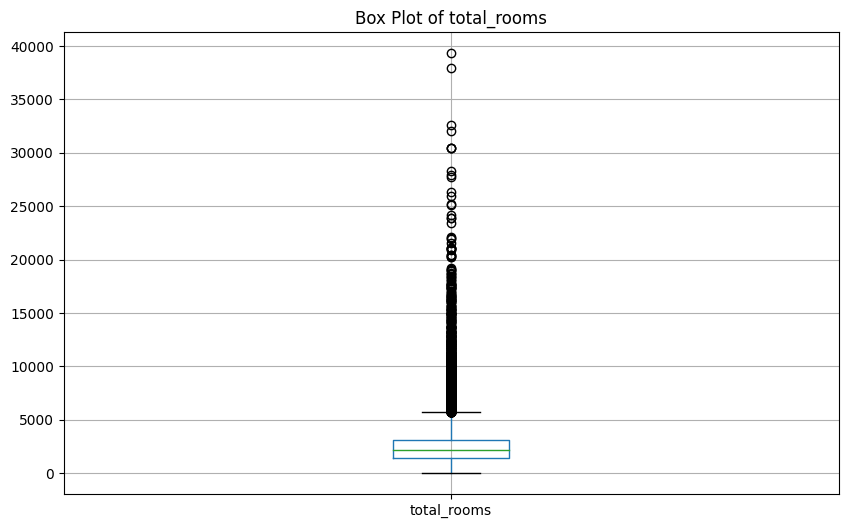

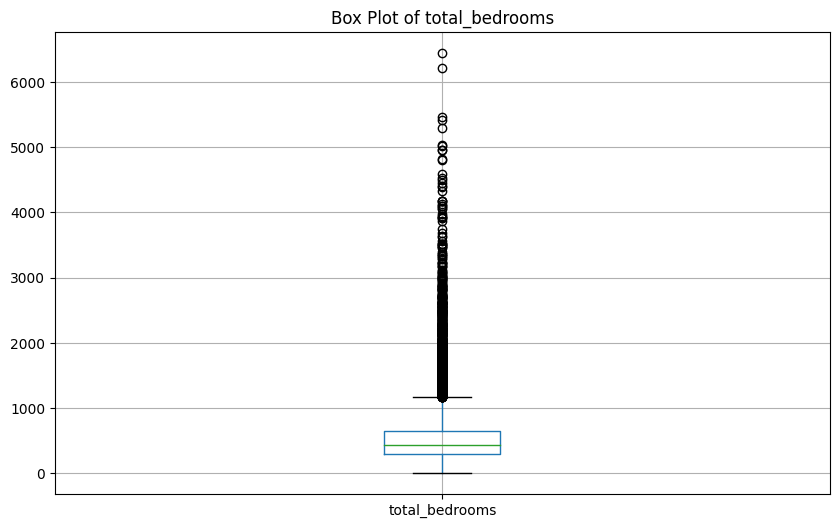

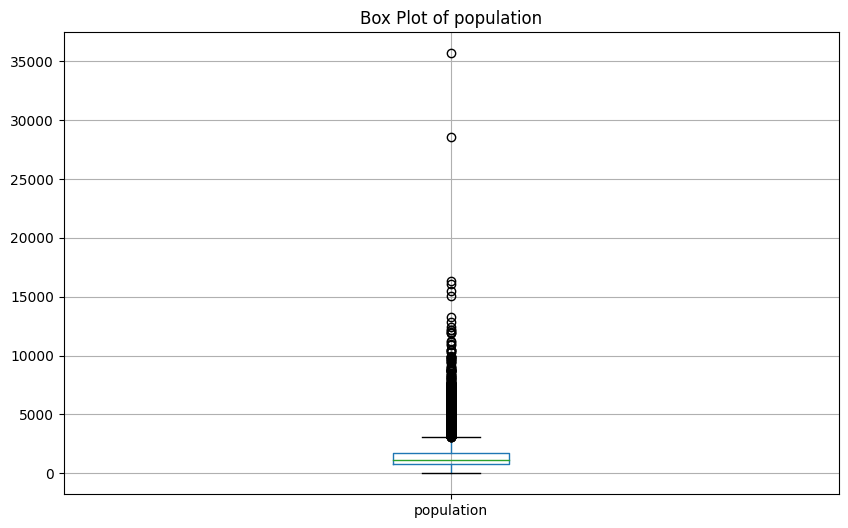

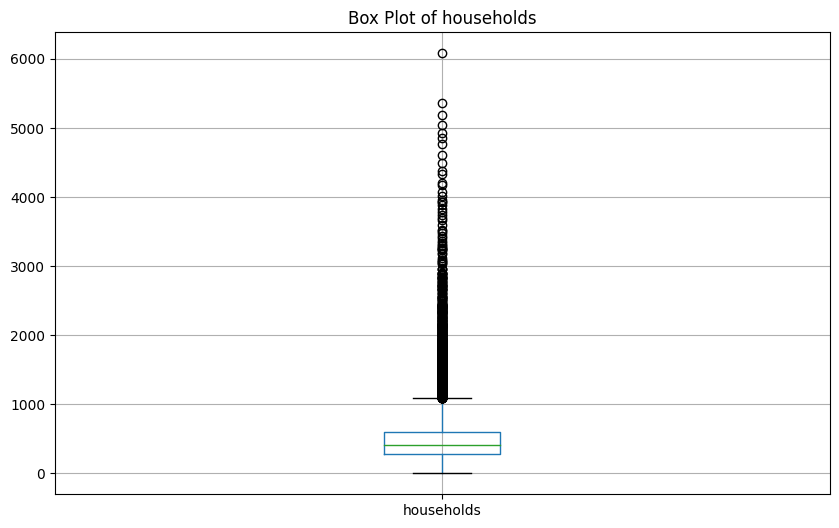

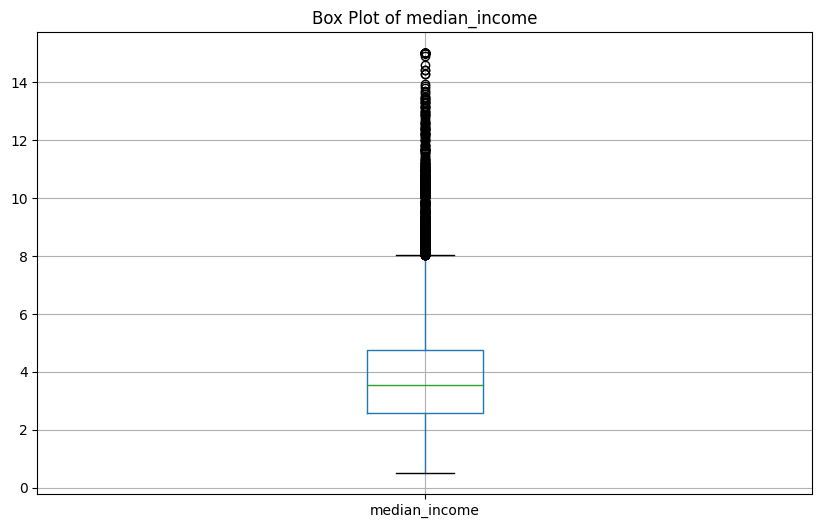

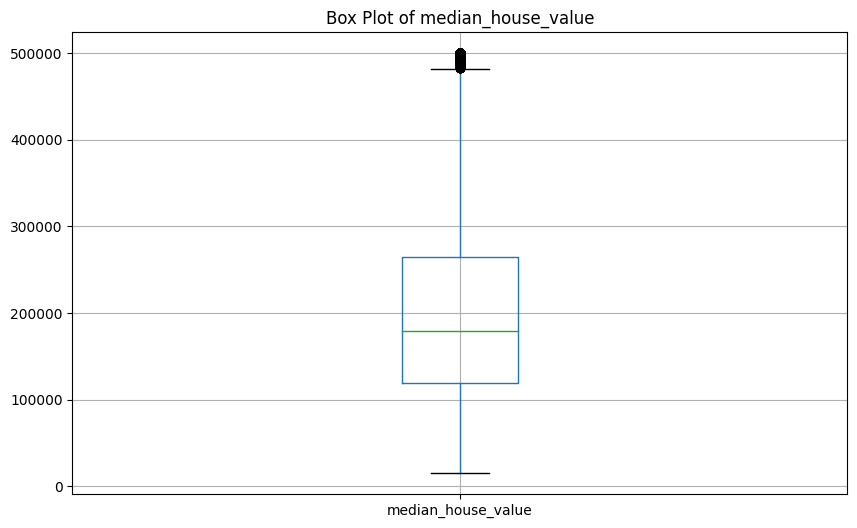

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


In [15]:
def Evaluate_Data_Quality(data):
  data.hist(bins=50, figsize=(25,15))
  plt.show()

  for x in data.columns:
    if x == "longitude" or x == "latitude" or x == "ocean_proximity":
      continue
    plt.figure(figsize=(10,6))
    data.boxplot(column=x)
    plt.title(f"Box Plot of {x}")
    plt.show()
  data = data.drop("ocean_proximity", axis=1)
  corr_matrix = data.corr()
  print(corr_matrix["median_house_value"].sort_values(ascending=False))
Evaluate_Data_Quality(Raw_Data)

### 3.) Evaluate Data Quality ( Conclusion )
* Similar to our first histogram visualization it is clear on the box plots that there are many outliers to the head of the distribution. Further indicating a tail skewed distribution.



## Atrribute Simplfication/Combination
* Simplifying so atrributes like:
* * Total rooms per Household
* * Total bedrooms per Household
* * Population per Household

In [16]:
# Simplification
# Added Total rooms per household
# Added total bedrooms per household
# Added population per househild
data_v2 = data_v1.copy()
data_v2["total_rooms_per_household"] = data_v2["total_rooms"]/data_v2["households"]
data_v2["total_bedrooms_per_household"] = data_v2["total_bedrooms"]/data_v2["households"]
data_v2["population_per_household"] = data_v2["population"]/data_v2["households"]
corr_matrix = data_v2.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value              1.000000
median_income                   0.688355
<1H OCEAN                       0.257614
NEAR BAY                        0.160526
total_rooms_per_household       0.151344
NEAR OCEAN                      0.140378
total_rooms                     0.133294
housing_median_age              0.106432
households                      0.064894
total_bedrooms                  0.049686
ISLAND                          0.023525
population_per_household       -0.023639
population                     -0.025300
longitude                      -0.045398
total_bedrooms_per_household   -0.046739
latitude                       -0.144638
INLAND                         -0.484787
Name: median_house_value, dtype: float64


## Capped Labels DataFrame

In [17]:
# Did not use Capped Labels for the final product, as it did not express accruate data
# All Capped rows are Dropped
# And placed in the DataFrame Capped_rows_df
data_v2 = data_v2.reset_index()
Capped_rows = data_v2[(data_v2["median_house_value"] >= 500000)].index
Capped_rows_df = data_v2.loc[Capped_rows]
data_v2 = data_v2.drop(Capped_rows)
Capped_rows_df = Capped_rows_df.drop(["index", "longitude", "latitude"], axis=1)  # Drop columns from Capped_rows_df
Capped_rows_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,NEAR OCEAN,<1H OCEAN,ISLAND,INLAND,total_rooms_per_household,total_bedrooms_per_household,population_per_household
89,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,1.0,0.0,0.0,0.0,0.0,2.929412,0.917647,4.658824
457,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,1.0,0.0,0.0,0.0,0.0,2.436000,0.944000,5.396000
491,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,1.0,0.0,0.0,0.0,0.0,7.794393,1.051402,2.415888
492,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,1.0,0.0,0.0,0.0,0.0,7.512097,0.955645,2.754032
507,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,1.0,0.0,0.0,0.0,0.0,8.282548,1.049861,2.623269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20217,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,0.0,0.0,1.0,0.0,0.0,6.958333,1.217593,2.666667
20221,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,0.0,0.0,1.0,0.0,0.0,9.890756,1.159664,3.487395
20222,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,0.0,0.0,1.0,0.0,0.0,7.236059,1.032528,2.553439
20231,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,0.0,0.0,1.0,0.0,0.0,9.873315,1.102426,3.177898


## Atrribute Simplfication/Combination ( Analysis )
* This looks a lot better. After we one hot encoded our ocean proximity column it makes sense that our housing prices and the location of the house would impact the price of housing in a positive way. This verifies the realtionship we see on our heatmap andg geographical map.

# Split Data into Training, Validation and Test sets

* We Will Run a:
* * 90% Training Set
* * 5% Validation Set
* * 5% Test Set
* Where
* * x = Training set
* * y = Test set
* * z = Validation set

In [18]:
# Splitting data
data_with_id = data_v2.dropna(axis=0)
data_with_id = data_v2.reset_index()
# Decided to drop housing median age, population, Households, and total_bedrooms as its correaltion was very
# close to 0 and my models accuracy improved across the boards
X = data_with_id.drop(["median_house_value", "longitude", "latitude", "index", "level_0", "housing_median_age", "population", "households", "total_bedrooms"], axis=1)
y = data_with_id["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=100)


#  Split Data into Training, Validation and Test sets (Summary)
* we created a new data set data_with_id that dropped longitude, latitude, and the label medina_house_value as well as dropping all NaN rows.

## Taking a closer look at Median Income
* The correlation between median income and housing value seems relativly high compared to the other features at a value of 0.688075.
* We need a function that ensures all data sets are of similar distribution and metrics


In [19]:
#Comparing distributions between each set of data
def Summary_Statistics(train, test, validation):
    train_metrics = train["median_income"].describe().to_frame().add_suffix('_train')
    test_metrics = test["median_income"].describe().to_frame().add_suffix('_test')
    validation_metrics = validation["median_income"].to_frame().describe().add_suffix('_validation')

    # Combine metrics into a single DataFrame
    metrics = train_metrics.join(test_metrics).join(validation_metrics)
    return metrics
print(Summary_Statistics(X_train, X_test, X_val))


       median_income_train  median_income_test  median_income_validation
count         17503.000000          972.000000                973.000000
mean              3.681518            3.574099                  3.687123
std               1.570618            1.583714                  1.534724
min               0.499900            0.499900                  0.536000
25%               2.532350            2.404250                  2.566300
50%               3.456100            3.305650                  3.515400
75%               4.591550            4.401925                  4.571400
max              15.000100           11.054600                 10.124800


## Taking a closer look at Median Income (Analysis)
* Using this function to ensure potentially high impact or highly correlated features is vital to training a balanced and accruate model.
* Since we need to deal with the data cap of our labels, it would make sense that the test set and validatio resementle similar statistics

## Feature Scaling
* Min-Max Scaling ( Normalization )
* Standardization

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Min Max Scaling
scaler = MinMaxScaler()
X_train_Min_Max_scaled = scaler.fit_transform(X_train)
X_test_Min_Max_scaled = scaler.transform(X_test)
X_val_Min_Max_scaled = scaler.transform(X_val)
print(X_val_Min_Max_scaled)

# Standardization
scaler = StandardScaler()
X_train_Standardized_scaled = scaler.fit_transform(X_train)
X_test_Standardized_scaled = scaler.transform(X_test)
X_val_Standardized_scaled = scaler.transform(X_val)

print(X_val_Standardized_scaled)

[[7.49020805e-02 2.18838361e-01 1.00000000e+00 ... 2.36940209e-02
  2.21168322e-02 9.42956885e-04]
 [3.33180731e-02 1.08377815e-01 0.00000000e+00 ... 2.37654397e-02
  2.38950773e-02 2.31554344e-03]
 [1.56086271e-01 5.00475856e-01 0.00000000e+00 ... 5.41174430e-02
  2.06483240e-02 2.25736544e-03]
 ...
 [4.41782390e-02 1.69880415e-01 0.00000000e+00 ... 3.35912967e-02
  2.09306504e-02 1.56933218e-03]
 [8.29899791e-02 2.21603840e-01 0.00000000e+00 ... 3.29920132e-02
  2.26377272e-02 1.52700369e-03]
 [1.96907269e-01 1.92535275e-01 0.00000000e+00 ... 2.56101428e-01
  1.98290161e-01 1.17808947e-03]]
[[ 1.41381217e-01 -5.36009793e-03  2.89481556e+00 ... -5.95485699e-01
  -3.85359043e-02 -1.10744991e-01]
 [-5.95642832e-01 -1.02517894e+00 -3.45445152e-01 ... -5.91481596e-01
   8.95746215e-02  4.06734253e-02]
 [ 1.58026853e+00  2.59483731e+00 -3.45445152e-01 ...  1.11020473e+00
  -1.44331985e-01  3.42554541e-02]
 ...
 [-4.03160099e-01 -4.57360719e-01 -3.45445152e-01 ... -4.05945138e-02
  -1.23992

## Build -> Compile -> Evaluate -> Tweak Model
* Model 1
* * 1 Hidden Layer
* * 10 epochs
* * Standard Gradient Descent as optimzer
* * No Change in Learning Rate
* * Using MAE


In [21]:
# Min Max Scaled Data
X_Min_Max = tf.constant(X_train_Min_Max_scaled)
tf.random.set_seed(42)

Model1_Min_Max = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

Model1_Min_Max.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

Model1_Min_Max.fit(X_Min_Max, y_train, epochs=10)

# Standardized Data
X_Standardized = tf.constant(X_train_Standardized_scaled)
tf.random.set_seed(42)

Model1_Standardized = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

Model1_Standardized.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
Model1_Standardized.fit(X_Standardized, y_train, epochs=10)

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 194525.3594 - mae: 194525.3594
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 194517.7656 - mae: 194517.7656
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 194510.2031 - mae: 194510.2031
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 194502.6562 - mae: 194502.6562
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 194495.0781 - mae: 194495.0781
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 194487.5469 - mae: 194487.5469
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 194479.9688 - mae: 194479.9688
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 194472.3125 - mae: 194472.3125
Epoch 9/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 194464.7344 - mae: 194464.7344
Epoch 10/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 194457.1719 - mae: 194457.1719
Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 194525.8125 - mae: 194525.812

In [25]:
# Validation Testing
val_Min_Max_prediction = Model1_Min_Max.predict(X_val_Min_Max_scaled)
print(X_val_Standardized_scaled)
val_Standardized_prediction = Model1_Standardized.predict(X_val_Standardized_scaled)
mae_val_Min_Max = mean_absolute_error(y_val.to_numpy().flatten(), val_Min_Max_prediction.flatten())
mae_val_Standardized = mean_absolute_error(y_val.to_numpy().flatten(), val_Standardized_prediction.flatten())

print("Validation MAE for Min-Max Scaled Data:", mae_val_Min_Max)
print("Validation MAE for Standardized Scaled Data:", mae_val_Standardized)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 1.41381217e-01 -5.36009793e-03  2.89481556e+00 ... -5.95485699e-01
  -3.85359043e-02 -1.10744991e-01]
 [-5.95642832e-01 -1.02517894e+00 -3.45445152e-01 ... -5.91481596e-01
   8.95746215e-02  4.06734253e-02]
 [ 1.58026853e+00  2.59483731e+00 -3.45445152e-01 ...  1.11020473e+00
  -1.44331985e-01  3.42554541e-02]
 ...
 [-4.03160099e-01 -4.57360719e-01 -3.45445152e-01 ... -4.05945138e-02
  -1.23992280e-01 -4.16457021e-02]
 [ 2.84729013e-01  2.01719839e-02 -3.45445152e-01 ... -7.41933689e-02
  -1.00894058e-03 -4.63152171e-02]
 [ 2.30376921e+00 -2.48201395e-01 -3.45445152e-01 ...  1.24344453e+01
   1.26535606e+01 -8.48060779e-02]]
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation MAE for Min-Max Scaled Data: 191280.67695726274
Validation MAE for Standardized Scaled Data: 191301.12178081108


In [26]:
# Test Testing
test_Min_Max_prediction = Model1_Min_Max.predict(X_test_Min_Max_scaled)
test_Standardized_prediction = Model1_Standardized.predict(X_test_Standardized_scaled)

# Calculate MAE
rmse_test_Min_Max = mean_absolute_error(y_test.to_numpy().flatten(), test_Min_Max_prediction.flatten())
rmse_test_Standardized = mean_absolute_error(y_test.to_numpy().flatten(), test_Standardized_prediction.flatten())

print("Test MAE for Min-Max Scaled Data:", rmse_test_Min_Max)
print("Test MAE for Standardized Scaled Data:", rmse_test_Standardized)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test MAE for Min-Max Scaled Data: 187720.60654641766
Test MAE for Standardized Scaled Data: 187741.38188078767


## Model Analysis
* Model 1
* * Min Max Scaled Data

* * * Mae and Loss seem very large, indications of underfitting are high.

* * Standardized Scaled Data

* * * Standardization Sclaed data seems to effect the learning rate. The rate of mae and loss between each epoch is greater than that of the Min Max Scaled Data

Important to note the Standardization may offer more control over the loss and learning. While Min Max normalization looks to provide a greater learning rate which may reduce significant computational power, but lack in the control as the increments of loss may be large.


## Build -> Compile -> Evaluate -> Tweak Model
* Model 2
* * 3 Hidden Layers
* * Use MAE
* * Use 50 Epochs
* * Use Activation Function ReLu
* * Optimizer Adam
* * Learning Rate Adjusted to 0.001

In [27]:
# Min Max Scaled Data Model
X_Min_Max = tf.constant(X_train_Min_Max_scaled)
tf.random.set_seed(42)

Model2_Min_Max = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

Model2_Min_Max.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

Model2_Min_Max.fit(X_Min_Max, y_train, epochs=50)

# Standardized Scaled Data Model
X_Standardized = tf.constant(X_train_Standardized_scaled)
print(X_Standardized.shape)
tf.random.set_seed(42)

Model2_Standardized = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Option 1: Use string identifier (recommended)
Model2_Standardized.compile(
    loss='mse',  # Use 'mse' for Mean Squared Error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]  # Calculate RMSE as a metric
)

Model2_Standardized.fit(X_Standardized, y_train, epochs=50)

Epoch 1/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 173547.8125 - mae: 173547.8125
Epoch 2/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 58852.1602 - mae: 58852.1602
Epoch 3/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54688.1445 - mae: 54688.1445
Epoch 4/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51983.5977 - mae: 51983.5977
Epoch 5/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 49739.4336 - mae: 49739.4336
Epoch 6/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 48268.2969 - mae: 48268.2969
Epoch 7/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47513.9414 - mae: 47513.9414
Epoch 8/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 47144.6719 - mae: 47144.6719
Epoch 9/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 46960.2461 - mae: 46960.2461
Epoch 10/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46831.7109 - mae: 46831.7109
Epoch 11/50
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46754.2266 - mae: 46754.2266
Epoch 12/50
547/5

In [28]:


# Validation Testing
val_Min_Max_prediction = Model2_Min_Max.predict(X_val_Min_Max_scaled)
val_Standardized_prediction = Model2_Standardized.predict(X_val_Standardized_scaled)

# Calculate MAE
rmse_val_Min_Max = mean_absolute_error(y_val.to_numpy().flatten(), val_Min_Max_prediction.flatten())
rmse_val_Standardized = mean_absolute_error(y_val.to_numpy().flatten(), val_Standardized_prediction.flatten())

print("Validation RMSE for Min-Max Scaled Data:", rmse_val_Min_Max)
print("Validation RMSE for Standardized Scaled Data:", rmse_val_Standardized)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Validation RMSE for Min-Max Scaled Data: 46989.847933260535
Validation RMSE for Standardized Scaled Data: 44319.95090891572


In [29]:


# Test Testing
test_Min_Max_prediction = Model2_Min_Max.predict(X_test_Min_Max_scaled)
test_Standardized_prediction = Model2_Standardized.predict(X_test_Standardized_scaled)

# Calculate MAE
rmse_test_Min_Max = mean_absolute_error(y_test.to_numpy().flatten(), test_Min_Max_prediction.flatten())
rmse_test_Standardized = mean_absolute_error(y_test.to_numpy().flatten(), test_Standardized_prediction.flatten())

print("Test MAE for Min-Max Scaled Data:", rmse_test_Min_Max)
print("Test MAEfor Standardized Scaled Data:", rmse_test_Standardized)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test MAE for Min-Max Scaled Data: 45810.39243344907
Test MAEfor Standardized Scaled Data: 41427.358076935445


## Model 3
 * 5 hidden Layers
 * Use MAE
 * Use 100 Epochs
 * Use Activation Function Leaky ReLu
 * Optimizer Adam
 * Learning Rate Adjusted to 0.01

In [30]:
Model3_Min_Max = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
Model3_Min_Max.compile(loss=tf.keras.losses.mae, optimizer=optimizer, metrics=["mae"])
Model3_Min_Max.fit(X_Standardized, y_train, epochs=100)

Model3_Standardized = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
Model3_Standardized.compile(loss=tf.keras.losses.mae, optimizer=optimizer, metrics=["mae"])
Model3_Standardized.fit(X_Standardized, y_train, epochs=100)

Epoch 1/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 119009.5156 - mae: 119009.5156
Epoch 2/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 44633.3047 - mae: 44633.3047
Epoch 3/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43328.5039 - mae: 43328.5039
Epoch 4/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42792.1797 - mae: 42792.1797
Epoch 5/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42610.6875 - mae: 42610.6875
Epoch 6/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42470.7305 - mae: 42470.7305
Epoch 7/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42349.5625 - mae: 42349.5625
Epoch 8/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42237.1172 - mae: 42237.1172
Epoch 9/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 42150.5742 - mae: 42150.5742
Epoch 10/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 42092.2500 - mae: 42092.2500
Epoch 11/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 41947.5742 - mae: 41947.5742
Epoch 

In [31]:
# Validation Testing
val_Min_Max_prediction = Model3_Min_Max.predict(X_val_Min_Max_scaled)
print(X_val_Standardized_scaled)
val_Standardized_prediction = Model3_Standardized.predict(X_val_Standardized_scaled)
mae_val_Min_Max = mean_absolute_error(y_val.to_numpy().flatten(), val_Min_Max_prediction.flatten())
mae_val_Standardized = mean_absolute_error(y_val.to_numpy().flatten(), val_Standardized_prediction.flatten())

print("Validation MAE for Min-Max Scaled Data:", mae_val_Min_Max)
print("Validation MAE for Standardized Scaled Data:", mae_val_Standardized)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[ 1.41381217e-01 -5.36009793e-03  2.89481556e+00 ... -5.95485699e-01
  -3.85359043e-02 -1.10744991e-01]
 [-5.95642832e-01 -1.02517894e+00 -3.45445152e-01 ... -5.91481596e-01
   8.95746215e-02  4.06734253e-02]
 [ 1.58026853e+00  2.59483731e+00 -3.45445152e-01 ...  1.11020473e+00
  -1.44331985e-01  3.42554541e-02]
 ...
 [-4.03160099e-01 -4.57360719e-01 -3.45445152e-01 ... -4.05945138e-02
  -1.23992280e-01 -4.16457021e-02]
 [ 2.84729013e-01  2.01719839e-02 -3.45445152e-01 ... -7.41933689e-02
  -1.00894058e-03 -4.63152171e-02]
 [ 2.30376921e+00 -2.48201395e-01 -3.45445152e-01 ...  1.24344453e+01
   1.26535606e+01 -8.48060779e-02]]
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Validation MAE for Min-Max Scaled Data: 84953.98381294963
Validation MAE for Standardized Scaled Data: 41837.573873490495


In [32]:


# Test Testing
test_Min_Max_prediction = Model3_Min_Max.predict(X_test_Min_Max_scaled)
test_Standardized_prediction = Model3_Standardized.predict(X_test_Standardized_scaled)

# Calculate MAE
rmse_test_Min_Max = mean_absolute_error(y_test.to_numpy().flatten(), test_Min_Max_prediction.flatten())
rmse_test_Standardized = mean_absolute_error(y_test.to_numpy().flatten(), test_Standardized_prediction.flatten())

print("Test MAE for Min-Max Scaled Data:", rmse_test_Min_Max)
print("Test MAE for Standardized Scaled Data:", rmse_test_Standardized)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test MAE for Min-Max Scaled Data: 82049.51392505786
Test MAE for Standardized Scaled Data: 38149.44042767811


## Neural Network Structures
* Descending Structure (e.g. 256 -> 128 -> 64 -> 1)
* * Good starting point
* * Suitable when you want to gradually compress information and force the network to learn more abstrct represnetaitions
* * often preferred for clssifcation tasks
* Constant Width (e.g. 128 -> 128 -> 128:)
* * Can be good for sequential data
* * not too prefered
* Expanding Strucutre(e.g. 64 -> 128 -> 256)
* * Less common
* * Good for generative models

## Notes
* Look Into TensorBoard for tracking experiments

## Saving Our Model
* Two Types:
* * The SavedModel Format
* * HDF5 Format